In [1]:
library(pheatmap)

In [2]:
# NOT RUN {
# Create test matrix
test = matrix(rnorm(200), 20, 10)
test[1:10, seq(1, 10, 2)] = test[1:10, seq(1, 10, 2)] + 3
test[11:20, seq(2, 10, 2)] = test[11:20, seq(2, 10, 2)] + 2
test[15:20, seq(2, 10, 2)] = test[15:20, seq(2, 10, 2)] + 4
colnames(test) = paste("Test", 1:10, sep = "")
rownames(test) = paste("Gene", 1:20, sep = "")


想看看有没有白色的细线

还是有的

In [15]:
pheatmap(test,filename = 'test.pdf',border=F)


In [ ]:
# Draw heatmaps
pheatmap(test, kmeans_k = 2)
pheatmap(test, scale = "row", clustering_distance_rows = "correlation")
pheatmap(test, color = colorRampPalette(c("navy", "white", "firebrick3"))(50))
pheatmap(test, cluster_row = FALSE)
pheatmap(test, legend = FALSE)


In [16]:

# Show text within cells
# pheatmap(test, display_numbers = TRUE)
# #pheatmap(test, display_numbers = TRUE, number_format = "\%.1e")
# pheatmap(test, display_numbers = matrix(ifelse(test > 5, "*", ""), nrow(test)))
# pheatmap(test, cluster_row = FALSE, legend_breaks = -1:4, legend_labels = c("0",
# "1e-4", "1e-3", "1e-2", "1e-1", "1"))


In [8]:

# Fix cell sizes and save to file with correct size
# pheatmap(test, cellwidth = 15, cellheight = 12, main = "Example heatmap")
# pheatmap(test, cellwidth = 15, cellheight = 12, fontsize = 8, filename = "test.pdf")
pheatmap(test, filename = "test1.pdf",width=5,height = 5)


添加一些注释

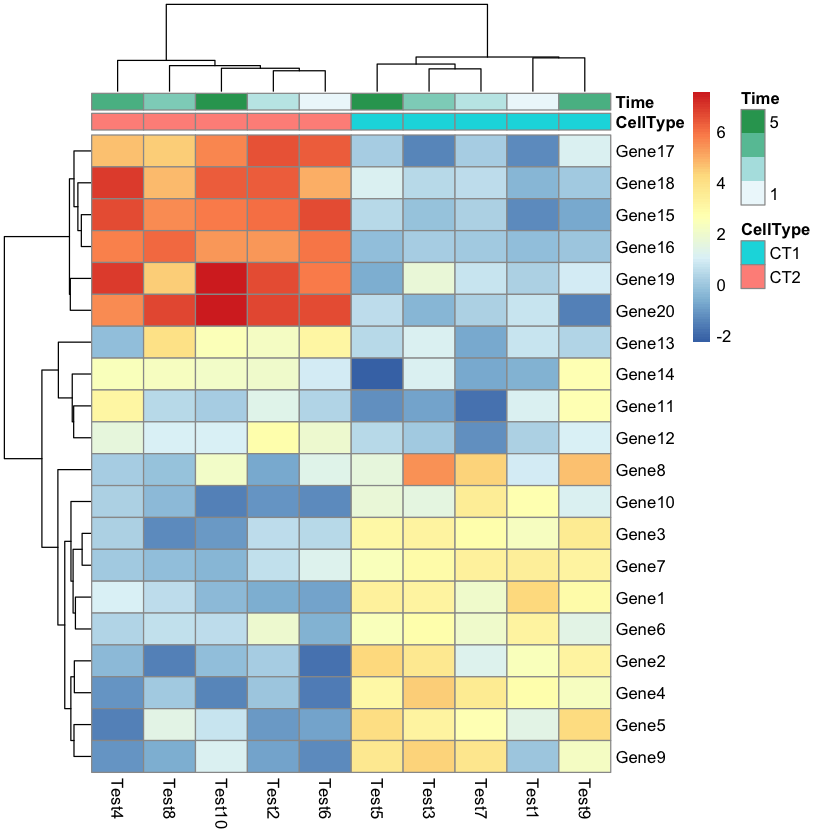

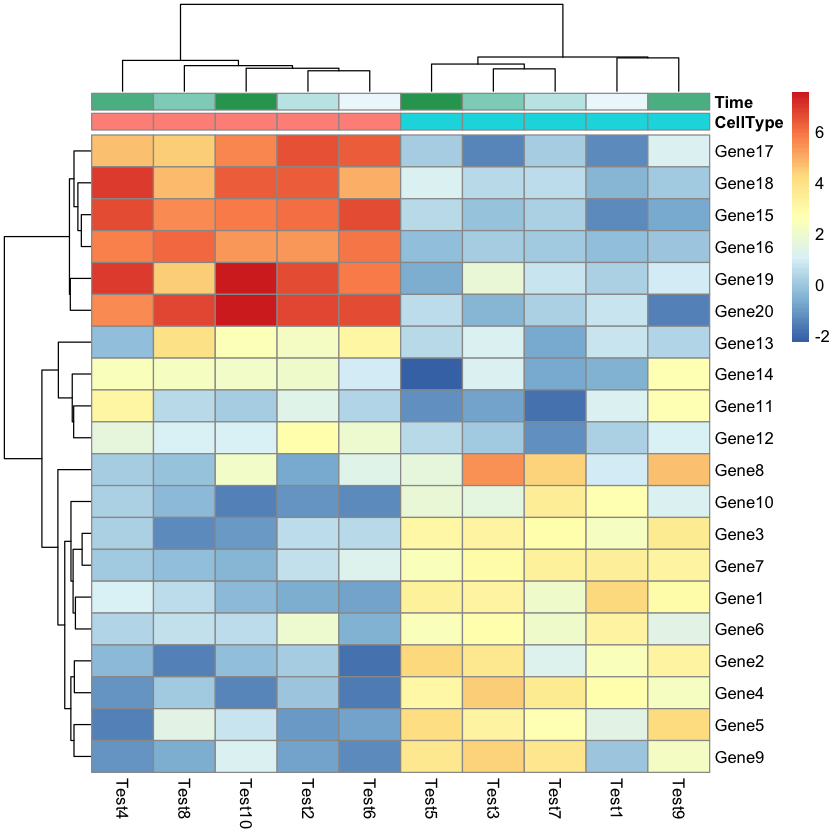

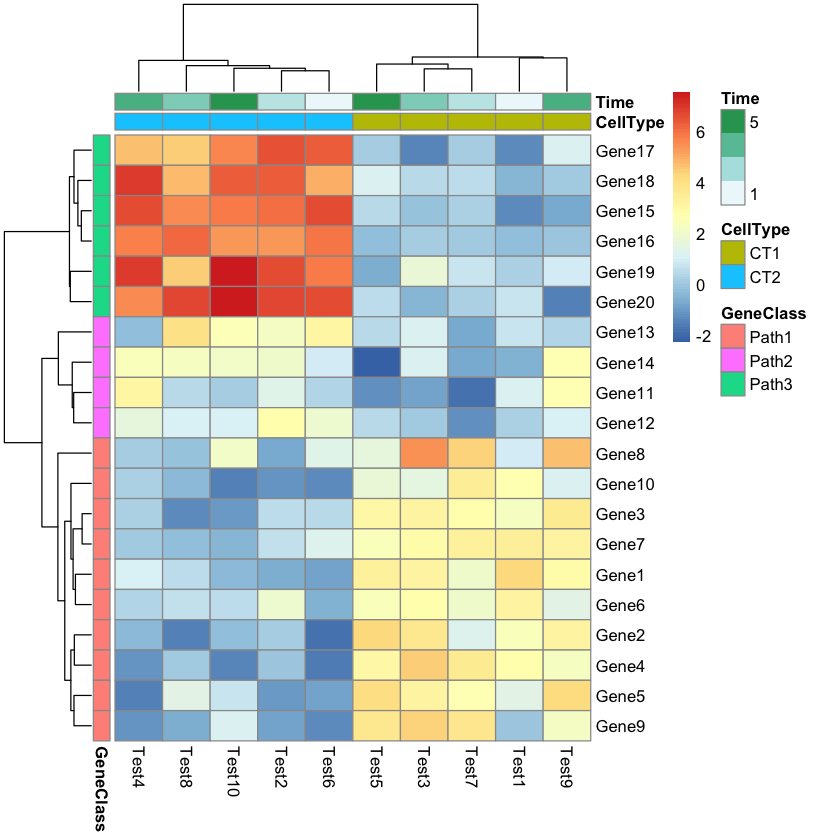

In [9]:

# Generate annotations for rows and columns
annotation_col = data.frame(
                    CellType = factor(rep(c("CT1", "CT2"), 5)), 
                    Time = 1:5
                )
rownames(annotation_col) = paste("Test", 1:10, sep = "")

annotation_row = data.frame(
                    GeneClass = factor(rep(c("Path1", "Path2", "Path3"), c(10, 4, 6)))
                )
rownames(annotation_row) = paste("Gene", 1:20, sep = "")

# Display row and color annotations
pheatmap(test, annotation_col = annotation_col)
pheatmap(test, annotation_col = annotation_col, annotation_legend = FALSE)
pheatmap(test, annotation_col = annotation_col, annotation_row = annotation_row)


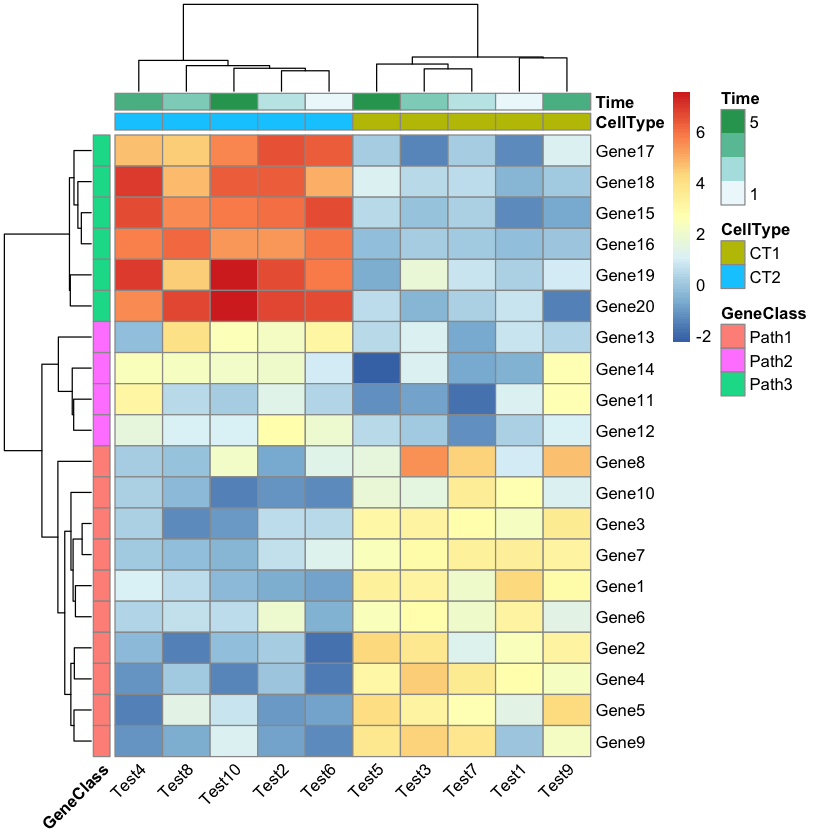

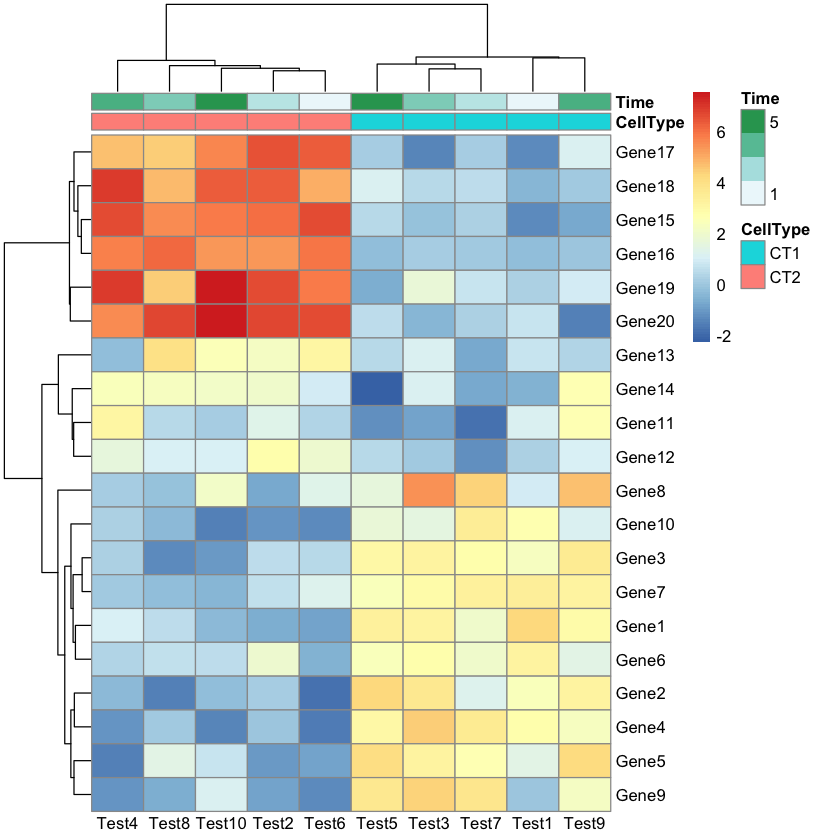

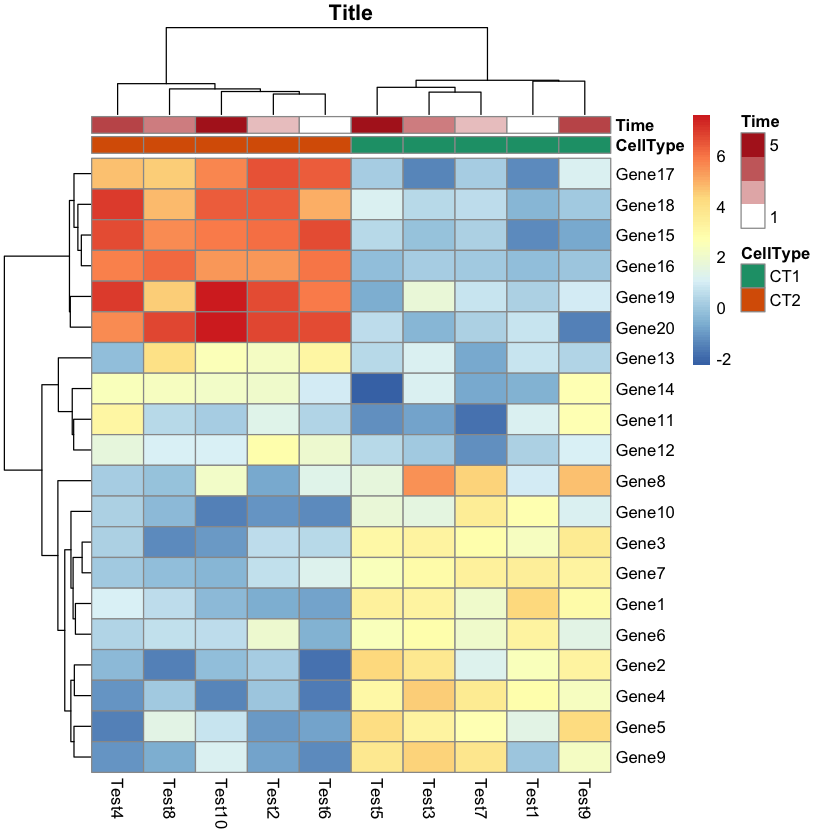

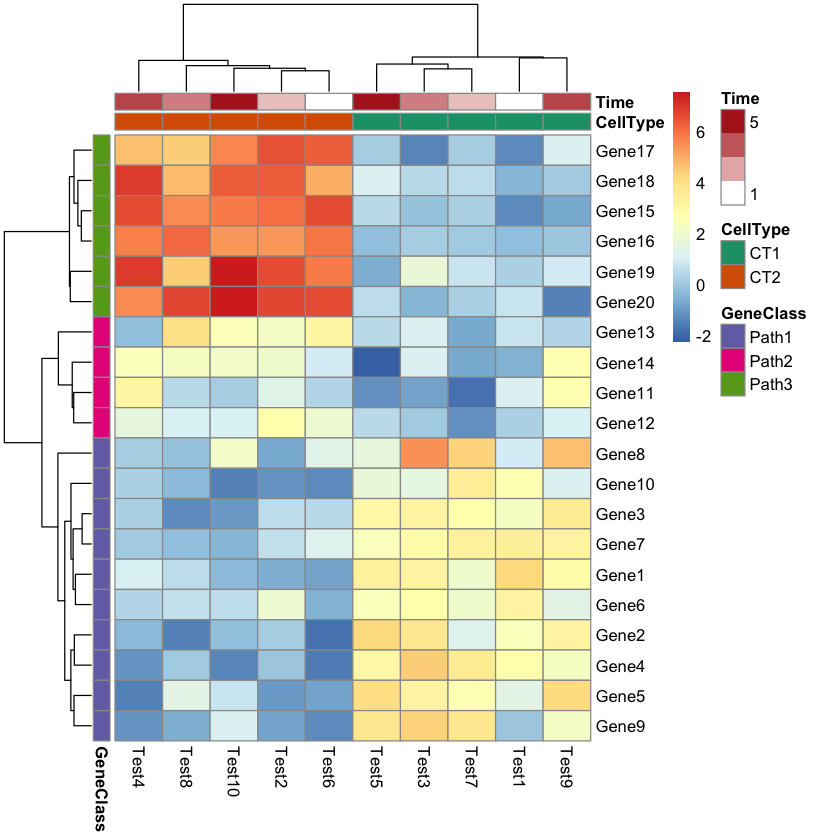

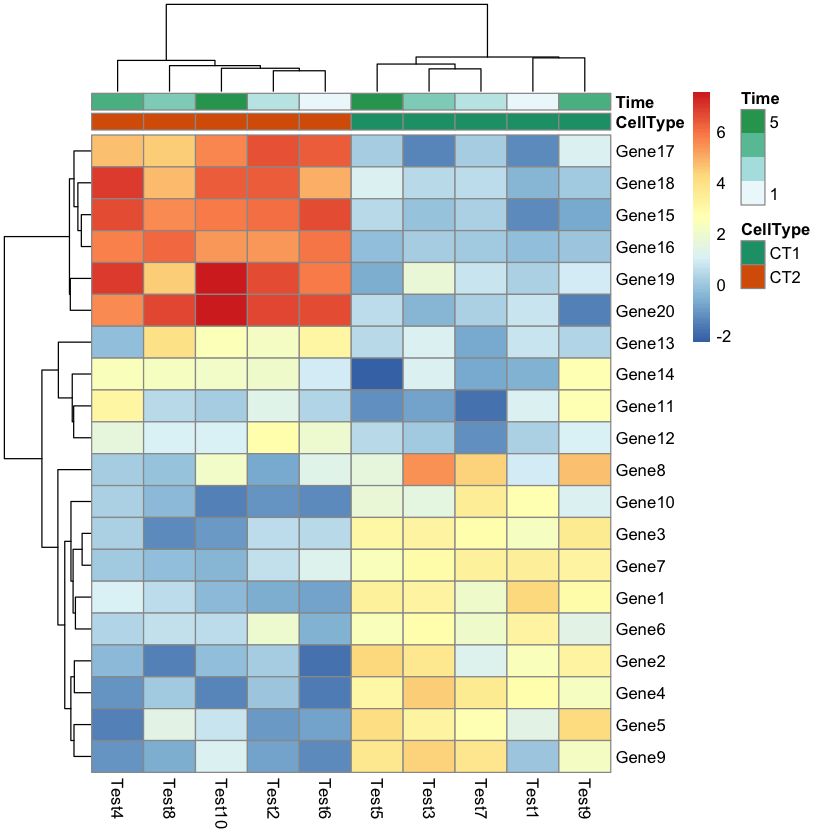

In [10]:

# Change angle of text in the columns
pheatmap(test, annotation_col = annotation_col, annotation_row = annotation_row, angle_col = "45")
pheatmap(test, annotation_col = annotation_col, angle_col = "0")

# Specify colors
ann_colors = list(
    Time = c("white", "firebrick"),
    CellType = c(CT1 = "#1B9E77", CT2 = "#D95F02"),
    GeneClass = c(Path1 = "#7570B3", Path2 = "#E7298A", Path3 = "#66A61E")
)

pheatmap(test, annotation_col = annotation_col, annotation_colors = ann_colors, main = "Title")
pheatmap(test, annotation_col = annotation_col, annotation_row = annotation_row, 
         annotation_colors = ann_colors)
pheatmap(test, annotation_col = annotation_col, annotation_colors = ann_colors[2]) 


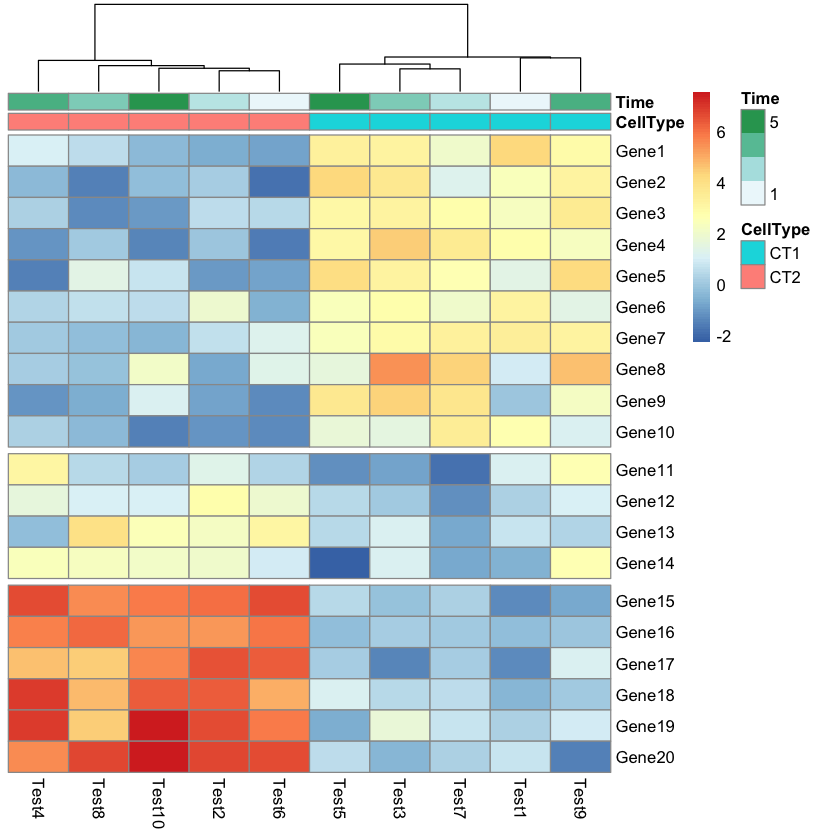

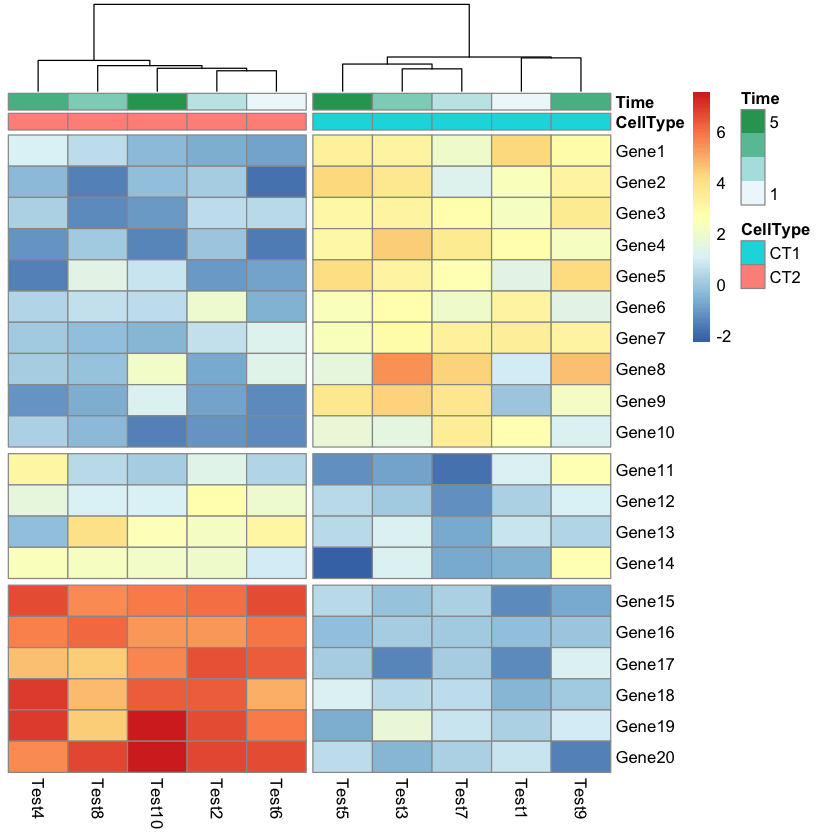

In [11]:

# Gaps in heatmaps
pheatmap(test, annotation_col = annotation_col, cluster_rows = FALSE, gaps_row = c(10, 14))
pheatmap(test, annotation_col = annotation_col, cluster_rows = FALSE, gaps_row = c(10, 14), 
         cutree_col = 2)


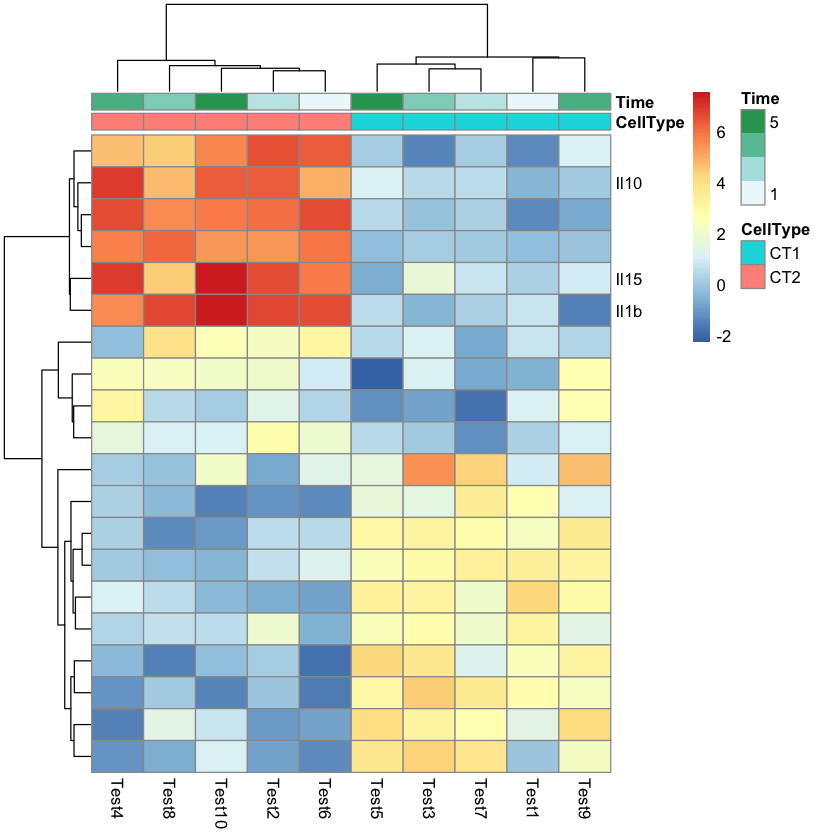

In [12]:

# Show custom strings as row/col names
labels_row = c("", "", "", "", "", "", "", "", "", "", "", "", "", "", "", 
"", "", "Il10", "Il15", "Il1b")

pheatmap(test, annotation_col = annotation_col, labels_row = labels_row)


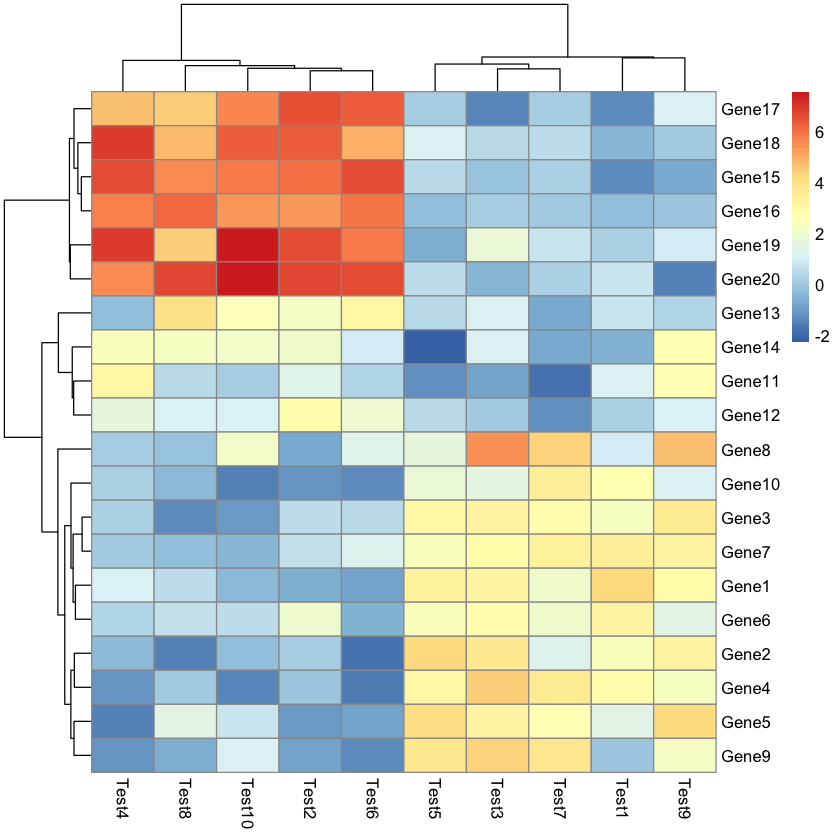

In [13]:

# Specifying clustering from distance matrix
drows = dist(test, method = "minkowski")
dcols = dist(t(test), method = "minkowski")
pheatmap(test, clustering_distance_rows = drows, clustering_distance_cols = dcols)


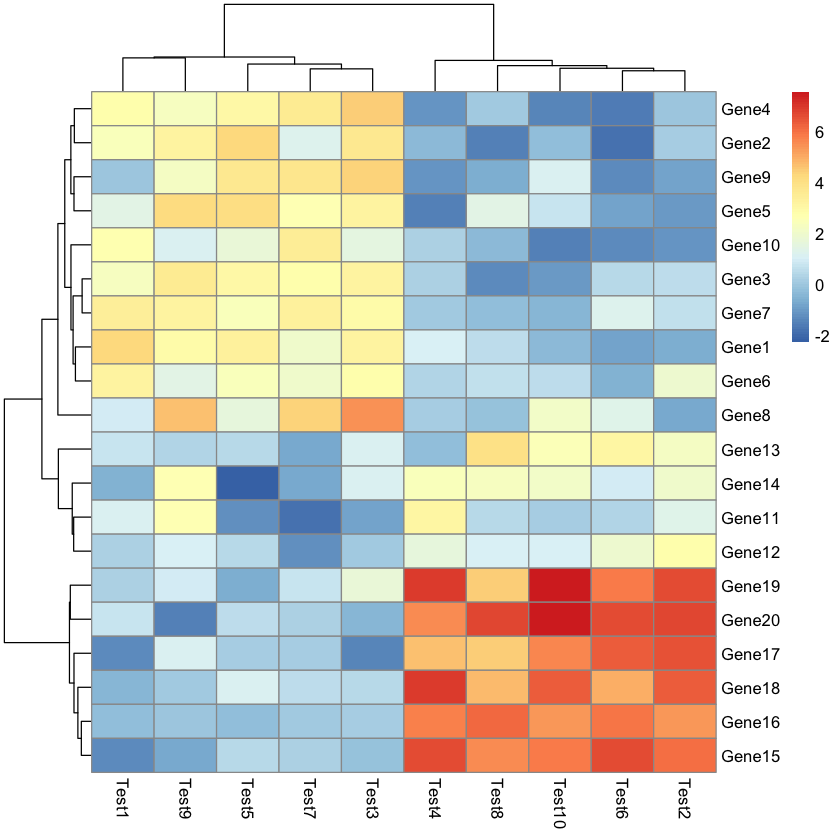

In [14]:

# Modify ordering of the clusters using clustering callback option
callback = function(hc, mat){
    sv = svd(t(mat))$v[,1]
    dend = reorder(as.dendrogram(hc), wts = sv)
    as.hclust(dend)
}

pheatmap(test, clustering_callback = callback)


In [ ]:

# }
# NOT RUN {
# Same using dendsort package
library(dendsort)

callback = function(hc, ...){dendsort(hc)}
pheatmap(test, clustering_callback = callback)
# }
# NOT RUN {
# }